# 남양주TG :: `서울방향`의 OD별 Local X (m)에 따른 속도 그래프
* 선 그래프로 모든 차량의 속도분포 나타내기
* 각 시작점 차로, 각 부스별로 나타내기

# Set Up

## Import

In [1]:
import numpy as np
import pandas as pd
import math
import os

from tqdm import tqdm

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Load Dataset

In [2]:
data_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/27_남양주영업소_드론영상분석/서울방향/01_density_by_target_LOS_concated_lanechange'

In [3]:
save_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/35_22-9차 회의 준비/15_OD별 x별 속도가속도분포 산점도/서울방향'

In [4]:
file_list = os.listdir(data_dir)
file_list = file_list[:6]
print(file_list)

['01_1_A.csv', '01_2_A.csv', '01_3_A.csv', '02_1_A.csv', '02_2_A.csv', '02_3_A.csv']


## Define Function
* 참고 : 2개의 컬럼에 apply 함수 적용 : https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe

In [5]:
def merge_str(origin, destination):
    """두 컬럼의 텍스트 값을 결합하여 OD를 만들어준다
    결과 : rigin_destination"""
    
    return origin + '_' + destination

## Color Palette
* 10색 무지개 컬러코드 : https://yagisanatode.com/2019/08/06/google-apps-script-hexadecimal-color-codes-for-google-docs-sheets-and-slides-standart-palette/

In [6]:
palette = {'U01': '#980000', 'U02': '#ff0000', 'U03': '#ff9900', 'U04': '#ffff00', 
           'U05': '#00ff00', 'U06': '#00ffff', 'U07': '#4a86e8', 'U08': '#0000ff',
           'U09': '#9900ff', 'U10': '#ff00ff',
           'U11':'#ead1dc', 'U12':'#d5a6bd', 'U13':'#c27ba0',
           'U14': '#a64d79', 'U15': '#741b47', 'U16': '#4c1130'}
# 레드베리, 빨주노초, 싸이안, 콘플라워블루, 블루, 퍼플, 마젠타 --- 총 10색

## OD, Lane Identification
* `01_1.csv` :
    * U1 ~ U4 : 그대로
* `01_2.csv` :
    * 시작 : U2, U3
    * 끝 : U4 ~ U7
* `01_3.csv` : 
    * 시작 : U3
    * 끝 : U8 ~ U11
* `02_1.csv` :
    * U1 ~ U6 : 그대로
* `02_2.csv` :
    * 시작 : U5~U10
    * 끝 : U5~U10
* `02_3.csv` : 
    * 시작, 끝 : U11~U16

# RUN

## 속도

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.16it/s]


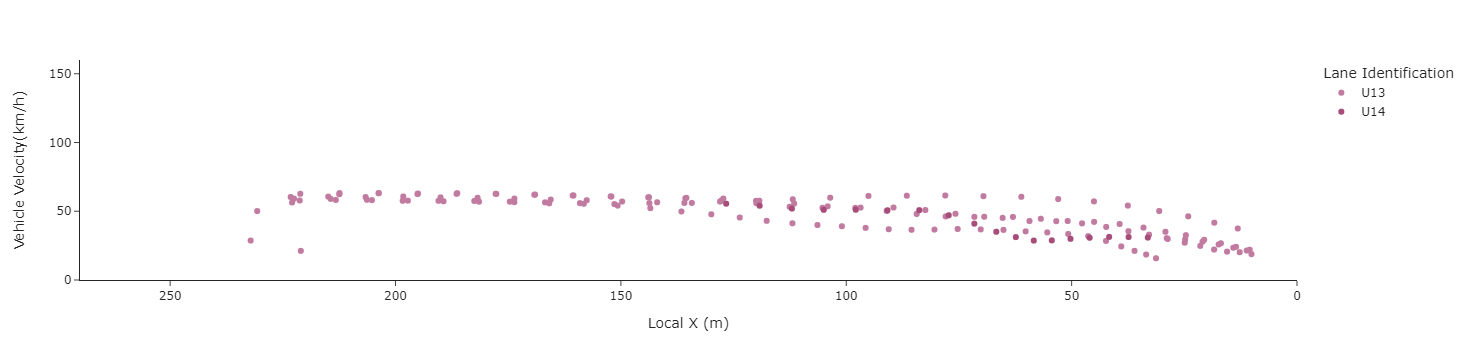

In [10]:
folder_name = '속도'

for file in file_list:
    
    file_path = os.path.join(data_dir, file) # 파일리스트의 파일별 경로 설정
    df = pd.read_csv(file_path)
    
    df = df[(df['Lane_00'] != 'UNKNOWN') & (df['Lane_99'] != 'UNKNOWN')] # UNKNOWN 제거 : 불필요해
    
    file_num = file[:4] # 파일및 영상번호
    
    if file_num == '01_1':
        re_lane = {'U1': 'U01', 'U2': 'U02', 'U3': 'U03', 'U4': 'U04', 'U5': 'U05', 'U6':'U06'}
        df['Lane Identification'].replace(re_lane, inplace = True)
        df['Lane_00'].replace(re_lane, inplace = True)
        df['Lane_99'].replace(re_lane, inplace = True)
        
    elif file_num == '01_2':
        re_lane = {'U1': 'U04', 'U2': 'U05', 'U3': 'U06', 'U4': 'U07'}
        df['Lane Identification'].replace(re_lane, inplace = True)
        df['Lane_00'].replace({'U1': 'U02', 'U2': 'U03', 'U3': 'U03', 'U4': 'U03'}, inplace = True)
        df['Lane_99'].replace(re_lane, inplace = True)
        
    elif file_num == '01_3':
        re_lane = {'U1': 'U08', 'U2': 'U09', 'U3': 'U10', 'U4': 'U11'}
        df['Lane Identification'].replace(re_lane, inplace = True)
        df['Lane_00'].replace({'U1': 'U03', 'U2': 'U03', 'U03': 'U03', 'U4': 'U03'}, inplace = True)
        df['Lane_99'].replace(re_lane, inplace = True)
    
    elif file_num == '02_1':
        re_lane = {'U1': 'U01', 'U2': 'U02', 'U3': 'U03', 'U4': 'U04', 'U5': 'U05', 'U6': 'U06'}
        df['Lane Identification'].replace(re_lane, inplace = True)
        df['Lane_00'].replace(re_lane, inplace = True)
        df['Lane_99'].replace(re_lane, inplace = True)
        
    elif file_num == '02_2':
        re_lane = {'U1': 'U05', 'U2': 'U06', 'U3': 'U07', 'U4': 'U08', 'U5': 'U09', 'U6': 'U10'}
        df['Lane Identification'].replace(re_lane, inplace = True)
        df['Lane_00'].replace(re_lane, inplace = True)
        df['Lane_99'].replace(re_lane, inplace = True)
        
    elif file_num == '02_3':
        re_lane = {'U1': 'U11', 'U2': 'U12', 'U3': 'U13', 'U4': 'U14', 'U5': 'U15', 'U6': 'U16'}
        df['Lane Identification'].replace(re_lane, inplace = True)
        df['Lane_00'].replace(re_lane, inplace = True)
        df['Lane_99'].replace(re_lane, inplace = True)
        
    else:
        pass
    
    df['OD'] = df.apply(lambda x: merge_str(x.Lane_00, x.Lane_99), axis = 1) # 함수를 적용하여 OD컬럼 생성
    OD_list = df['OD'].unique()
    
    #print(file, OD_list)
    
    for OD in tqdm(OD_list): # OD 리스트별로 필터링한다
        df_p = df[df['OD'] == OD] # 이 필터링된 그래프별로 속도 선그래프를 그려준다
        
        ## 산점도 그래프 그리기
        fig = px.scatter(df_p, x = 'Local X (m)', y = 'Vehicle Velocity(km/h)',
                         color = 'Lane Identification',
                         color_discrete_map = palette,
                         template = 'simple_white')
#        fig = px.line(df_p, x = 'Local X (m)', y = 'Vehicle Velocity(km/h)', line_group = 'Vehicle ID')
        
        ## 축설정 : x축 0~270, y축 0~160
        #fig.update_xaxes(autorange = 'reversed')
        fig.update_yaxes(range = [0, 160])
        fig.update_xaxes(range = [270, 0])

#         save_html_name = f'Velocity_by_OD_{file[-10:-6]}_{OD}.html'
#         save_html_path = os.path.join(save_dir, save_html_name)
    
#         fig.write_html(file = save_html_path) # html Plotly 파일 저장
    
#         #글자 없는 것을 PNG 투명이미지로 저장
#         fig.update_layout({
#                 'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
#                 'paper_bgcolor' : 'rgba(0, 0, 0, 0)'
#             })
        
        save_png_name = f'Velocity_by_OD_{file[-10:-6]}_{OD}.png'
        save_folder_dir = os.path.join(save_dir, folder_name)
        save_png_path = os.path.join(save_folder_dir, save_png_name)        
        
        fig.write_image(save_png_path)
    
fig.show()

## 가속도

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.77it/s]


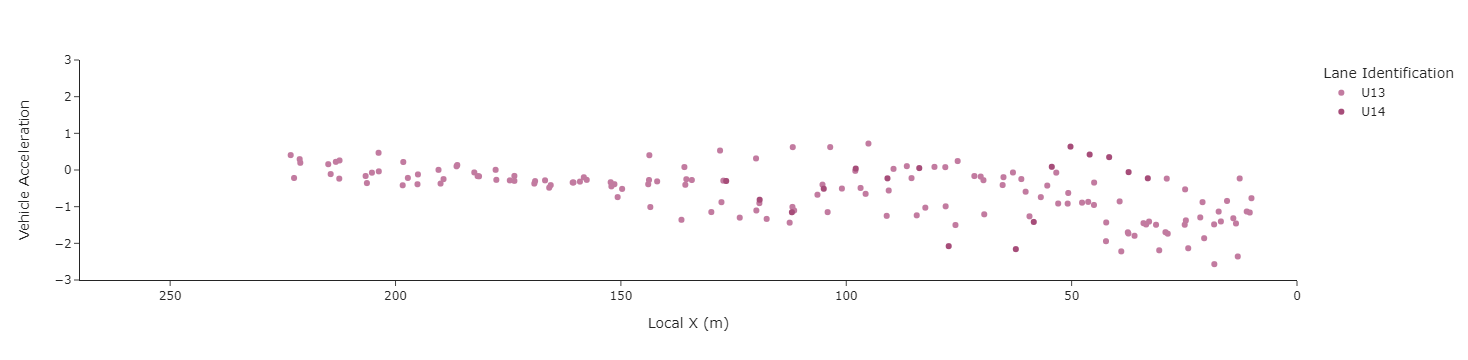

In [11]:
folder_name = '가속도'

for file in file_list:
    
    file_path = os.path.join(data_dir, file) # 파일리스트의 파일별 경로 설정
    df = pd.read_csv(file_path)
    
    df = df[(df['Lane_00'] != 'UNKNOWN') & (df['Lane_99'] != 'UNKNOWN')] # UNKNOWN 제거 : 불필요해
    
    file_num = file[:4] # 파일및 영상번호
    
    if file_num == '01_1':
        re_lane = {'U1': 'U01', 'U2': 'U02', 'U3': 'U03', 'U4': 'U04', 'U5': 'U05', 'U6':'U06'}
        df['Lane Identification'].replace(re_lane, inplace = True)
        df['Lane_00'].replace(re_lane, inplace = True)
        df['Lane_99'].replace(re_lane, inplace = True)
        
    elif file_num == '01_2':
        re_lane = {'U1': 'U04', 'U2': 'U05', 'U3': 'U06', 'U4': 'U07'}
        df['Lane Identification'].replace(re_lane, inplace = True)
        df['Lane_00'].replace({'U1': 'U02', 'U2': 'U03', 'U3': 'U03', 'U4': 'U03'}, inplace = True)
        df['Lane_99'].replace(re_lane, inplace = True)
        
    elif file_num == '01_3':
        re_lane = {'U1': 'U08', 'U2': 'U09', 'U3': 'U10', 'U4': 'U11'}
        df['Lane Identification'].replace(re_lane, inplace = True)
        df['Lane_00'].replace({'U1': 'U03', 'U2': 'U03', 'U03': 'U03', 'U4': 'U03'}, inplace = True)
        df['Lane_99'].replace(re_lane, inplace = True)
    
    elif file_num == '02_1':
        re_lane = {'U1': 'U01', 'U2': 'U02', 'U3': 'U03', 'U4': 'U04', 'U5': 'U05', 'U6': 'U06'}
        df['Lane Identification'].replace(re_lane, inplace = True)
        df['Lane_00'].replace(re_lane, inplace = True)
        df['Lane_99'].replace(re_lane, inplace = True)
        
    elif file_num == '02_2':
        re_lane = {'U1': 'U05', 'U2': 'U06', 'U3': 'U07', 'U4': 'U08', 'U5': 'U09', 'U6': 'U10'}
        df['Lane Identification'].replace(re_lane, inplace = True)
        df['Lane_00'].replace(re_lane, inplace = True)
        df['Lane_99'].replace(re_lane, inplace = True)
        
    elif file_num == '02_3':
        re_lane = {'U1': 'U11', 'U2': 'U12', 'U3': 'U13', 'U4': 'U14', 'U5': 'U15', 'U6': 'U16'}
        df['Lane Identification'].replace(re_lane, inplace = True)
        df['Lane_00'].replace(re_lane, inplace = True)
        df['Lane_99'].replace(re_lane, inplace = True)
        
    else:
        pass
    
    df['OD'] = df.apply(lambda x: merge_str(x.Lane_00, x.Lane_99), axis = 1) # 함수를 적용하여 OD컬럼 생성
    OD_list = df['OD'].unique()
    
    #print(file, OD_list)
    
    for OD in tqdm(OD_list): # OD 리스트별로 필터링한다
        df_p = df[df['OD'] == OD] # 이 필터링된 그래프별로 속도 선그래프를 그려준다
        
        ## 산점도 그래프 그리기
        fig = px.scatter(df_p, x = 'Local X (m)', y = 'Vehicle Acceleration',
                         color = 'Lane Identification',
                         color_discrete_map = palette,
                         template = 'simple_white')
#        fig = px.line(df_p, x = 'Local X (m)', y = 'Vehicle Velocity(km/h)', line_group = 'Vehicle ID')
        
        ## 축설정 : x축 0~270, y축 0~160
        fig.update_xaxes(range = [270, 0])
        fig.update_yaxes(range = [-3, 3])

#         save_html_name = f'Velocity_by_OD_{file[-10:-6]}_{OD}.html'
#         save_html_path = os.path.join(save_dir, save_html_name)
    
#         fig.write_html(file = save_html_path) # html Plotly 파일 저장
    
#         #글자 없는 것을 PNG 투명이미지로 저장
#         fig.update_layout({
#                 'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
#                 'paper_bgcolor' : 'rgba(0, 0, 0, 0)'
#             })
        
        save_png_name = f'acc_by_OD_{file[-10:-6]}_{OD}.png'
        save_folder_dir = os.path.join(save_dir, folder_name)
        save_png_path = os.path.join(save_folder_dir, save_png_name)        
        
        fig.write_image(save_png_path)
    
fig.show()